<center>
    <h1><b>Covid-19 Prediction</b></h1>
    -----------------------------
</center>

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
# loading dataset
df = pd.read_csv('COVID19.csv', low_memory=False)

### Data Exploration

In [11]:
print(f' Head: {df.head(5)} \n\nTail: {df.tail(5)}')

 Head:       Sex  Birth Year Chest pain Chills or sweats Confused or disoriented  \
0    MALE      1967.0         NO               NO                      NO   
1    MALE      1976.0        NaN              NaN                     NaN   
2    MALE      1988.0         NO               NO                      NO   
3    MALE      1980.0        NaN              NaN                     NaN   
4  FEMALE      1978.0         NO               NO                      NO   

  Cough Diarrhea Difficulty breathing or Dyspnea  \
0    NO       NO                              NO   
1   NaN      NaN                             NaN   
2    NO       NO                              NO   
3   NaN      NaN                             NaN   
4   YES       NO                             YES   

  Digested blood or coffee grounds in vomit  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                            

In [12]:
print(df.shape)

(109927, 47)


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109927 entries, 0 to 109926
Data columns (total 47 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Sex                                        107228 non-null  object 
 1   Birth Year                                 94963 non-null   float64
 2   Chest pain                                 42120 non-null   object 
 3   Chills or sweats                           24857 non-null   object 
 4   Confused or disoriented                    23127 non-null   object 
 5   Cough                                      42218 non-null   object 
 6   Diarrhea                                   42092 non-null   object 
 7   Difficulty breathing or Dyspnea            24940 non-null   object 
 8   Digested blood or coffee grounds in vomit  1397 non-null    object 
 9   Pain behind eyes or Sensitivity to light   1405 non-null    object 
 10  Bleeding

In [14]:
print(df.isnull().sum())

Sex                                            2699
Birth Year                                    14964
Chest pain                                    67807
Chills or sweats                              85070
Confused or disoriented                       86800
Cough                                         67709
Diarrhea                                      67835
Difficulty breathing or Dyspnea               84987
Digested blood or coffee grounds in vomit    108530
Pain behind eyes or Sensitivity to light     108522
Bleeding from the eyes                       108530
Fatigue or general weakness                   67769
Fever                                         67698
Fluid in the lung cavity                     108523
Fluid in lung cavity in auscultation          86501
Fluid in cavity through X-Ray                 86511
Bleeding of the gums                         108530
Headache                                      67847
Joint pain or arthritis                       85097
Thorax (sore

In [16]:
# Checking the percentage of missing values in each column
missing_values = df.isnull().sum() / len(df) * 100
missing_values

Sex                                           2.455266
Birth Year                                   13.612670
Chest pain                                   61.683663
Chills or sweats                             77.387721
Confused or disoriented                      78.961493
Cough                                        61.594513
Diarrhea                                     61.709134
Difficulty breathing or Dyspnea              77.312216
Digested blood or coffee grounds in vomit    98.729157
Pain behind eyes or Sensitivity to light     98.721879
Bleeding from the eyes                       98.729157
Fatigue or general weakness                  61.649094
Fever                                        61.584506
Fluid in the lung cavity                     98.722789
Fluid in lung cavity in auscultation         78.689494
Fluid in cavity through X-Ray                78.698591
Bleeding of the gums                         98.729157
Headache                                     61.720051
Joint pain

In [17]:
# Columns to drop based on missing values >= 70%
col_to_drop = missing_values[missing_values > 70].index.tolist()
print(f'number of columns to drop: {len(col_to_drop)} \n\nList of columns dropped:{col_to_drop}')

number of columns to drop: 31 

List of columns dropped:['Chills or sweats', 'Confused or disoriented', 'Difficulty breathing or Dyspnea', 'Digested blood or coffee grounds in vomit', 'Pain behind eyes or Sensitivity to light', 'Bleeding from the eyes', 'Fluid in the lung cavity', 'Fluid in lung cavity in auscultation', 'Fluid in cavity through X-Ray', 'Bleeding of the gums', 'Joint pain or arthritis', 'Malaise', 'Muscle pain', 'Other clinical symptoms', 'Pharyngeal exudate', 'Rapid breathing', 'Maculopapular rash', 'Bleeding or bruising', 'Abnormal lung X-Ray findings', 'Conjunctivitis', 'Acute respiratory distress syndrome', 'Pneumonia (clinical or radiologic)', 'Cough with sputum', 'Cough with heamoptysis', 'Enlarged lymph nodes', 'Wheezing', 'Skin ulcers', 'Inability to walk', 'Indrawing of chest wall', 'Other complications', 'Specify other complications']


In [18]:
#remainng columns n the dataframe
df1 = df.drop(columns = col_to_drop)
df1.head()

,Sex,Birth Year,Chest pain,Cough,Diarrhea,Fatigue or general weakness,Fever,Headache,Thorax (sore throat),Nausea,Runny nose,Sore throat or pharyngitis,Vomiting,Loss of Taste,Loss of Smell,Result
0,MALE,1967.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,PENDING
1,MALE,1976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MALE,1988.0,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NaN,NaN,NEGATIVE
3,MALE,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FEMALE,1978.0,NO,YES,NO,NO,NO,NO,YES,NO,YES,YES,NO,NaN,NaN,NEGATIVE


In [19]:
df1.isnull().sum()

Sex                             2699
Birth Year                     14964
Chest pain                     67807
Cough                          67709
Diarrhea                       67835
Fatigue or general weakness    67769
Fever                          67698
Headache                       67847
Thorax (sore throat)           69257
Nausea                         69253
Runny nose                     69250
Sore throat or pharyngitis     69257
Vomiting                       69258
Loss of Taste                  70090
Loss of Smell                  70098
Result                         34511
dtype: int64

In [20]:
# modify the column labels lower case and remove spaces
df1.columns = df1.columns.str.lower().str.replace(' ', '_')
df1.columns

Index(['sex', 'birth_year', 'chest_pain', 'cough', 'diarrhea',
       'fatigue_or_general_weakness', 'fever', 'headache',
       'thorax_(sore_throat)', 'nausea', 'runny_nose',
       'sore_throat_or_pharyngitis', 'vomiting', 'loss_of_taste',
       'loss_of_smell', 'result'],
      dtype='object')

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109927 entries, 0 to 109926
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   sex                          107228 non-null  object 
 1   birth_year                   94963 non-null   float64
 2   chest_pain                   42120 non-null   object 
 3   cough                        42218 non-null   object 
 4   diarrhea                     42092 non-null   object 
 5   fatigue_or_general_weakness  42158 non-null   object 
 6   fever                        42229 non-null   object 
 7   headache                     42080 non-null   object 
 8   thorax_(sore_throat)         40670 non-null   object 
 9   nausea                       40674 non-null   object 
 10  runny_nose                   40677 non-null   object 
 11  sore_throat_or_pharyngitis   40670 non-null   object 
 12  vomiting                     40669 non-null   object 
 13 

 **Replacing Nan values with percentage of value counts for each column**

In [22]:
# function to replace Nan values with percentage of values in each column to maintain original distribution of values
def replace_nan_with_percent(df):
    for col in df.columns:
        value_counts = df[col].value_counts(normalize = True)
        nan_ind = df[col].isna()
        if not nan_ind.empty:
            replace_values = np.random.choice(value_counts.index, size = nan_ind.sum(), p = value_counts.values)
            df.loc[nan_ind, col] = replace_values
    return df

In [23]:
df1 = replace_nan_with_percent(df1)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109927 entries, 0 to 109926
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   sex                          109927 non-null  object 
 1   birth_year                   109927 non-null  float64
 2   chest_pain                   109927 non-null  object 
 3   cough                        109927 non-null  object 
 4   diarrhea                     109927 non-null  object 
 5   fatigue_or_general_weakness  109927 non-null  object 
 6   fever                        109927 non-null  object 
 7   headache                     109927 non-null  object 
 8   thorax_(sore_throat)         109927 non-null  object 
 9   nausea                       109927 non-null  object 
 10  runny_nose                   109927 non-null  object 
 11  sore_throat_or_pharyngitis   109927 non-null  object 
 12  vomiting                     109927 non-null  object 
 13 

In [25]:
# removing unknown values from the dataframe
df2 = df1.replace('UNKNOWN', pd.NA).dropna()
df2.shape

(107123, 16)

### Feature Engineering

In [26]:
# extracting age from birth year
df2['age'] = 2024 - df2.birth_year
df2.sample(5)

,sex,birth_year,chest_pain,cough,diarrhea,fatigue_or_general_weakness,fever,headache,thorax_(sore_throat),nausea,runny_nose,sore_throat_or_pharyngitis,vomiting,loss_of_taste,loss_of_smell,result,age
78573,MALE,1993.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE,31.0
66028,MALE,1977.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,PENDING,47.0
37090,FEMALE,1970.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE,54.0
19004,FEMALE,2002.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE,22.0
44688,FEMALE,1998.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,PENDING,26.0


In [27]:
# placing age in the first column 
df2.insert(0, 'age', df2.pop('age'))

In [28]:
# dropping the birth year column
df2.drop(columns = ['birth_year'], inplace = True)

In [29]:
df2.head(5)

,age,sex,chest_pain,cough,diarrhea,fatigue_or_general_weakness,fever,headache,thorax_(sore_throat),nausea,runny_nose,sore_throat_or_pharyngitis,vomiting,loss_of_taste,loss_of_smell,result
0,57.0,MALE,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,PENDING
1,48.0,MALE,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE
2,36.0,MALE,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE
3,44.0,MALE,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE
4,46.0,FEMALE,NO,YES,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO,NEGATIVE


**Ecoding the dataframe**

In [30]:
# encoding the target variable, result
label_encoder = LabelEncoder()
df2['result'] = label_encoder.fit_transform(df2['result'])

In [31]:
df2.result.head(5)

0    2
1    1
2    1
3    1
4    1
Name: result, dtype: int32

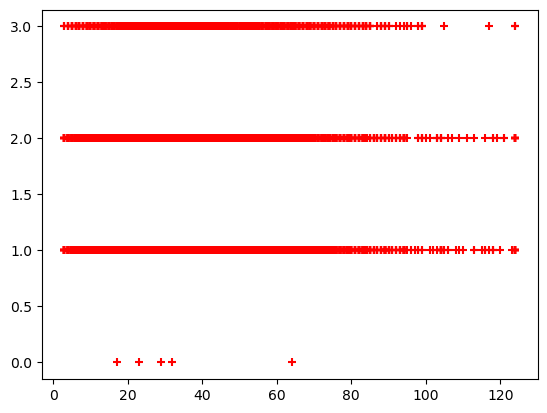

In [32]:
# visualize the relationship between age and result 
plt.scatter(df2.age, df2.result, marker = '+', color = 'r');

In [33]:
# list of columns with categorical values
cat_columns = [col for col in df2.select_dtypes(include='object').columns]
cat_columns   

['sex',
 'chest_pain',
 'cough',
 'diarrhea',
 'fatigue_or_general_weakness',
 'fever',
 'headache',
 'thorax_(sore_throat)',
 'nausea',
 'runny_nose',
 'sore_throat_or_pharyngitis',
 'vomiting',
 'loss_of_taste',
 'loss_of_smell']

In [52]:
# dummies encoding for the categorical variables, and concatenating with df1 dataframe
df_dum = pd.get_dummies(df2, columns = cat_columns, drop_first = True)
df_dum = df_dum.astype(int)

In [53]:
df3 = df_dum.copy()

In [54]:
df3.head(3)

,age,result,sex_MALE,sex_OTHER,chest_pain_YES,cough_YES,diarrhea_YES,fatigue_or_general_weakness_YES,fever_YES,headache_YES,thorax_(sore_throat)_YES,nausea_YES,runny_nose_YES,sore_throat_or_pharyngitis_YES,vomiting_YES,loss_of_taste_YES,loss_of_smell_YES
0,57,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,48,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,36,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [55]:
df3.drop(columns = ['loss_of_smell_YES'], inplace = True)

In [56]:
df3.head()

,age,result,sex_MALE,sex_OTHER,chest_pain_YES,cough_YES,diarrhea_YES,fatigue_or_general_weakness_YES,fever_YES,headache_YES,thorax_(sore_throat)_YES,nausea_YES,runny_nose_YES,sore_throat_or_pharyngitis_YES,vomiting_YES,loss_of_taste_YES
0,57,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,48,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,36,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,44,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,46,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0


### Model Building

In [40]:
# importing libraries for machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [66]:
# Defining feature variables X and the target y
X = df3.drop('result', axis = 1)
y = df3['result']

In [54]:
"""# Handling class imbalance across independent variables using SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)"""

**Logistic Regression Model**

In [58]:
# Spliting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Standardizing the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# model and Hyperparameter tunnng

log_reg = LogisticRegression(max_iter=1000)
log_reg_param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

In [ ]:
# gridsearch validation
log_reg_grid_search = GridSearchCV(estimator=log_reg, param_grid=log_reg_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
log_reg_grid_search.fit(X_train, y_train)

In [62]:
# Accuracy, Precision, recall, f1, roc_auc metrics function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC-ROC: {roc_auc}")

In [65]:
# logistic regression evaluation
log_reg_best = log_reg_grid_search.best_estimator_
log_reg_metrics = evaluate_model(log_reg_best, X_test_scaled, y_test)



ValueError: Number of classes in y_true not equal to the number of columns in 'y_score'

**Decision Tree Model**

In [72]:
# model building and regularization
tree = DecisionTreeClassifier()
tree_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [73]:
# Hyperparameter tunnig

tree_grid_search = GridSearchCV(estimator=tree, param_grid=tree_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

tree_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_weighted')

In [74]:
#Decision tree evaluation

tree_best = tree_grid_search.best_estimator_
tree_metrics = evaluate_model(tree_best, X_test_scaled, y_test)

Accuracy: 0.4652758437349672
Precision: 0.4565511363156665
Recall: 0.4652758437349672
F1 Score: 0.4535136722302853
AUC-ROC: 0.7343396453944534


**Random Forest Model**

In [75]:
# model and regularization strength
forest = RandomForestClassifier()

forest_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [76]:
# Hyperparameter tuning
forest_grid_search = GridSearchCV(estimator=forest, param_grid=forest_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
forest_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_weighted')

In [77]:
# model evaluation
forest_best = forest_grid_search.best_estimator_
forest_metrics = evaluate_model(forest_best, X_test_scaled, y_test)

Accuracy: 0.4682127756538471
Precision: 0.4600895459587303
Recall: 0.4682127756538471
F1 Score: 0.45764169133208654
AUC-ROC: 0.7376569615858807


**Gradient Boosting Model**

In [78]:
gbm = GradientBoostingClassifier()
gbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [ ]:
gbm_grid_search = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
gbm_grid_search.fit(X_train_scaled, y_train)


gbm_best = gbm_grid_search.best_estimator_
gbm_metrics = evaluate_model(gbm_best, X_test_scaled, y_test)